<a href="https://colab.research.google.com/github/hillsonghimire/EO-training-resources/blob/main/01.GEE_Python/01.GettingStarted/GettingStartedWithGEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================
#  Title:  Getting started with Google Earth Engine (python api)
#  Author: hillson ghimire
#  Date:   Dec 2024
# ==========================================

### Google Earth Engine

Google Earth Engine (GEE) is a platform for **scientific analysis and visualization** of geospatial datasets, for academic, non-profit, business and government users. There are lots of satellite data and geo spatial data gathered every day. Those data are not used by many people due to large size and complicated nature of satellite data. GEE provides online platform that can be used to access, visualize, analyze those data within google cloud.


Useful Links:

https://developers.google.com/earth-engine/guides/getstarted

https://developers.google.com/earth-engine/tutorials

#### Why Google Earth Engine?

1.   Massive geospatial data archives
2.   Faster analysis with cloud processing
3.   Commercial access is now available
4.   Scalable and time-seriea analysis
5.   Education and Outreach opportunities

An API is a way to communicate with Earth Engine servers. It allows you to
specify what computation you would like to do and then to receive the results. The API is designed so that users do not need to worry about how the computation is distributed across a cluster of machines, and the results are assembled. Users of the API simply specify what needs to be done. This greatly simplifies the code by hiding the implementation detail from the users. It also makes Earth Engine very approachable for users who are not familiar with writing code.



#### Google Earth Engine Initial Set-up

In this exercise, we will use a python library call "geemap" to visualize GEE data in a map. Let's first install "geemap" library, using "pip" Python package-management system."

In [ ]:
# !pip install geemap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import ee
import geemap
ee.Authenticate()

In [ ]:
# Replace project-id with your project ID
# Follow seteps in the URL: https://docs.google.com/presentation/d/1dUz_bUfV57OIuXEAoMxbvXRZeXbqB7bd-_RhIjCcE90/edit?usp=sharing
ee.Initialize(project='<your project name>')

In [ ]:
# Map visualisation parameters
zoom = 8
width="40%"
center = [29.9617498,61.7604367]

# Sample: Initialization of map
Map = geemap.Map()
Map = geemap.Map(center=center, zoom = zoom,  width=width)
Map

## 1. Working with Images

Raster data are represented as *Image* objects in Earth Engine. Images are composed of *one or more bands* and each band has its own name, data type, scale, mask and projection. Each image has *metadata* stored as a set of properties.

Images are **core building blocks** of remotely sensed imagery in Earth Engine.

#### 1.1 Loading Image from ImageCollection in Earth Engine Archieve


[Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets/catalog)

In [ ]:
print("Hello World")

In [ ]:
# Accessing an Image
image = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_156039_20130410')

# Read image properties and metadata: Displays all metadata
display(image)

#### 1.2 Image Information and Metadata

In [ ]:
# Get information about the bands as a list.
band_names = image.bandNames()
display('Band names:', band_names)  # ee.List of band names

# Get projection information from band 1.
b1_proj = image.select('SR_B1').projection()
display('Band 1 projection:', b1_proj)  # ee.Projection object
# b1_proj

# Get scale (in meters) information from band 1.
b1_scale = image.select('SR_B1').projection().nominalScale()
display('Band 1 scale:', b1_scale)  # ee.Number

# Note that different bands can have different projections and scale.
b3_scale = image.select('SR_B3').projection().nominalScale()
display('Band 3 scale:', b3_scale)  # ee.Number

In [ ]:
# Get a list of all metadata properties.
properties = image.propertyNames()
display('Metadata properties:', properties)  # ee.List of metadata properties

In [ ]:
# Get a specific metadata property.
cloudiness = image.get('CLOUD_COVER')
display('CLOUD_COVER:', cloudiness)  # ee.Number

# Get the timestamp. (time stamp of image acquisition)
ee_date = ee.Date(image.get('system:time_start'))
display('Timestamp:', ee_date)  # ee.Date

# Date objects transferred to the client are milliseconds since UNIX epoch;
# convert to human readable date with ee.Date.format().
display('Datetime:', ee_date.format())  # ISO standard date string

In [ ]:
# Image visualisation
Map = geemap.Map(center = center, zoom = zoom,  width=width)
Map.addLayer(image)
Map

#### 1.3 True Color Visualisation

In [ ]:
vis_param_L8 = {'min': 0, 'max': 30000, 'bands': ['SR_B4', 'SR_B3', 'SR_B2']} # for landsat raw image visualization

Map = geemap.Map(center = center, zoom = zoom,  width=width)
Map.addLayer(image, vis_param_L8, name="Landsat 8 Image")
Map

#### 1.4 Selecting Single band from the image composite



In [ ]:
NIR_single_band = image.select('SR_B5')

# Display properties
display(NIR_single_band)

# Visualize
Map = geemap.Map(center = center, zoom = zoom,  width=width)
Map.addLayer(NIR_single_band, name="NIR Band")
Map

#### Exercise 1
**What is the spacecraft id for the image loaded above?**

*Hint: Query the 'SPACECRAFT_ID' property from the image above*

In [ ]:
#  Write code here

spc_id = image.get('SPACECRAFT_ID')
display(spc_id)

#### Exercise 2

**Try to visualize false color composite for Infrared (vegetation) -> B5, B4, B3**

(Reference: https://www.esri.com/arcgis-blog/products/product/imagery/band-combinations-for-landsat-8/)

In [ ]:
# Write code here
vis_param_L8 = {'min': 0, 'max': 30000, 'bands': ['SR_B5', 'SR_B4', 'SR_B3']} # for landsat raw image visualization

Map = geemap.Map(center = center, zoom = zoom,  width=width)
Map.addLayer(image, vis_param_L8, name="FCC")
Map

#### 1.3 Loading uploaded geotiff

In [ ]:
# Path to the geotiff, local storage or remote storage
uri = (
    'gs://gcp-public-data-landsat/LC08/01/001/002/'
    + 'LC08_L1GT_001002_20160817_20170322_01_T2/'
    + 'LC08_L1GT_001002_20160817_20170322_01_T2_B5.TIF'
)

# uri = ('C://data/data.tif')

cloud_image = ee.Image.loadGeoTIFF(uri)
display(cloud_image)


---
---
---


## 2. Working with Image Collections

**Image Collections: An Organized Set of Images**. In Earth Engine, these are organized into an **ImageCollection**, a specialized data type that has specific operations available in the Earth Engine API. Like individual images, they can be viewed with **Map.addLayer**.


An ImageCollection is a stack or sequence of images. An ImageCollection can be loaded by pasting an Earth Engine asset ID into the ImageCollection constructor.

#### 2.1 Load Image Collection


In [ ]:
# Define Area of Interest (AOI)
aoi = ee.Geometry.Rectangle(61.220534, 29.575174, 61.220534, 29.575174)

# Load landsat8 image collection
L8Col = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterBounds(aoi)
display(L8Col)

In [ ]:
# Print the size of the Landsat 8 dataset.
totalImages = L8Col.size().getInfo()
print("Total number or images over AOI:", totalImages)

In [ ]:
vis_param_L8 = {'min': 0, 'max': 30000, 'bands': ['SR_B4', 'SR_B3', 'SR_B2']} # for landsat raw image visualization

Map = geemap.Map(center = center, zoom = zoom,  width=width)
Map.addLayer(L8Col, vis_param_L8, name="Landsat 8 Image")
Map

#### 2.2 Filtering Image Collection
The **ImageCollection** data type in Earth Engine has multiple approaches to
filtering, which helps to pinpoint the exact images you want to view or analyze
from the larger collection.

In [ ]:
# Filter by Date
L8Col_date = L8Col.filterDate('2020-01-01', '2023-12-31')

totalImages = L8Col_date.size().getInfo()
print("Total number or images after cloud filter:", totalImages)

In [ ]:
# Selecting first image
display(L8Col_date.first())

#### Exercise 3

Filter by Cloud Cover property on 'L8Col_date' image collection, the cloud cover should be less than 20%.
How many images remains after Cloud Cover filter in the above collection?

HINT: Use **'CLOUD_COVER'** property, and mathematical operation **ee.Filter.lt()**

In [ ]:
# Write code here

L8_CloudFilter = L8Col_date.filter(ee.Filter.lt('CLOUD_COVER', 20))
L8_CloudFilter.size().getInfo()

#### 2.3 Image Mosaicking

Mosaicking refers to the process of spatially assembling images to produce a spatially continuous image.

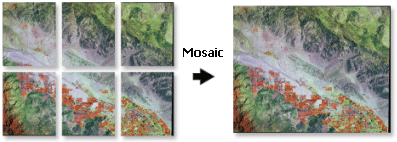

In [ ]:
aoi = ee.Geometry.Rectangle(103.66, 12.39, 104.64, 13.28)
lst8Col = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate('2021-10-01', '2023-12-31').filterBounds(aoi)
lst8Col = lst8Col.sort('CLOUD_COVER')

# Number of images in the collection
print("Before Mosaic: ",lst8Col.size().getInfo())

lst8Col_mosaic = lst8Col.mosaic()

# Select NIR Band Only
lst8Col_mosaic_nir = lst8Col_mosaic.select('SR_B5')

#Visualize the result
Map = geemap.Map(center = [12.9674,104.0529], zoom = zoom,  width=width)
vis_Para = {'min': 19900, 'max': 31241.7}
Map.addLayer(lst8Col_mosaic_nir, vis_Para, name="LS8_Tonle_Sap")
Map

#### 2.4 Mapping over image collection
Mapping can be used to perform a mathematical operation over all images in an ImageCollection. As example, if we want to calculate flood in all images of a ImageCollection, we can use mapping operation as below

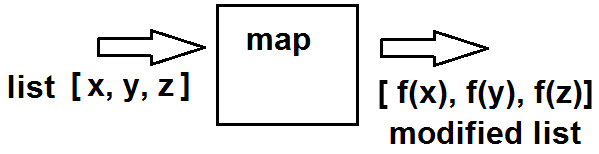

In [ ]:
aoi = ee.Geometry.Rectangle(103.66, 12.39, 104.64, 13.28)
lst8Col = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate('2018-09-01', '2018-10-31').filterBounds(aoi)
lst8Col = lst8Col.sort('CLOUD_COVER')

# Simple thresholding Algorithm
def waterDetection(image):
  return image.select('SR_B5').lt(10000)

# Map over the function
lst8Col_water = lst8Col.map(waterDetection)

# Select NIR band
lst8Col_water_1 = lst8Col_water.first().select('SR_B5')

Map = geemap.Map(center = [12.9674,104.0529], width=width, zoom = 8)
vis_Para = {'min': 0, 'max': 1}
Map.addLayer(lst8Col_water_1, vis_Para, name="LS8_Tonle_Sap")
Map


---
---
---



## 3. Mathematical Operations

Image math can be performed using operators like **add()** and **subtract()**, but for complex computations with more than a couple of terms, the **expression()** function provides a good alternative.

Some commonly used mathematical operations on images are listed below:

* *image1.add(image2)* -> Addition between 2 images or image with a constant
* *image1.subtract(image2)* -> Subtraction between 2 images or image with a constant

* *image1.divide(image2)* -> Division between 2 images or image with a constant

*  *image1.multiply(image2)* -> Multiplication between 2 images or image with a constant

* *image1.pow(image2)* -> Power between 2 images or image with a constant

* *image1.lt(image2)* -> Less than operation between 2 images or image with a constant

* *image1.lte(image2)* -> Less than or equal between 2 images or image with a constant

* *image1.gt(image2)* -> Greater than between 2 images or image with a constant

* *image1.gte(image2)* -> Greater than or equal between 2 images or image with a constant

#### 3.1 'gt' operation
Classify DEM:

We can use simple mathematical operations on images by simply calling common mathematical function provided by GEE API. Here let's use "Greater Than" operation to classify elevation data in to 2 classes (class 1: > 1000m, class 2: <=1000m).

In [ ]:
dem = ee.Image('CGIAR/SRTM90_V4')
elevation = dem.select('elevation')

elevationMask = elevation.gt(1000)

And then **visualize results**

In [ ]:
Map = geemap.Map(center = center, width=width, zoom = zoom)
vis_Para = {'min': 0, 'max': 1, 'palette': ['brown', 'green']}
Map.addLayer(elevationMask, vis_Para, name="DEM Mask")
Map

#### 3.2 Using ***expression()*** function to write complex computations.

Compute Band Arithmetic on Landsat8 image for Vegetation Indices: NDVI Calculation

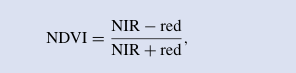

Bands in Landsat 8: blueBand = 'SR_B2', greenBand = 'SR_B3', redBand = 'SR_B4', nirBand = 'SR_B5', swirBand = 'SR_B6'

In [ ]:
image = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterBounds(aoi).filter(ee.Filter.lt('CLOUD_COVER', 10)).first()
NDVI = image.expression(
      '((nirBand - redBand) / (nirBand + redBand))',
        {
          'nirBand': image.select('SR_B5'),
          'redBand': image.select('SR_B4'),
        },
      ).rename("NDVI")


In [ ]:
Map = geemap.Map(center = center, width=width, zoom = zoom)
vis_Para = {'min': -1, 'max': 1, 'palette': 'Greens'}
Map.addLayer(NDVI, vis_Para, name="NDVI Map")
Map

#### Exercise 4
Apply **threshold on NDVI image** to separate different classes and visualize it.

Use the given range for classification

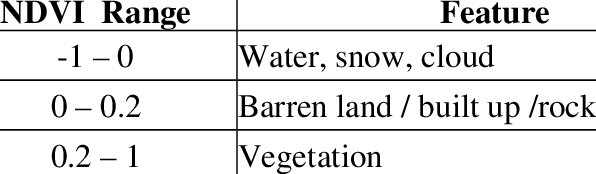

HINT:

```
classify_ndvi = NDVI \
      .where(NDVI.lte(<value>), 1) \
      .where(NDVI.gte(<value>).And(NDVI.lt(<value>)), 2) \
      .where(NDVI.gte(<value>), 3) \


Map = geemap.Map(center=center, zoom=zoom, width=width)

# Add the NDVI classification layer with a custom palette
Map.addLayer(
    classify_ndvi,
    {
        'min': 1,
        'max': 3,
        'palette': ['blue', 'green', 'red']
    },
    'NDVI Classification'
)

# Display the map
Map
```
Replace the <value> field with appropriate value corresponding to above table

In [ ]:
# Write code here
classify_ndvi = NDVI \
      .where(NDVI.lte(0), 1) \
      .where(NDVI.gte(0).And(NDVI.lt(0.2)), 2) \
      .where(NDVI.gte(0.2), 3) \

Map = geemap.Map(center=center, zoom=zoom, width=width)

# Add the NDVI classification layer with a custom palette
Map.addLayer(
    classify_ndvi,
    {
        'min': 1,
        'max': 3,
        'palette': ['blue', 'green', 'red']
    },
    'NDVI Classification'
)

# Display the map
Map

#### Exercise 5
Similarly try to calculate another advance vegetation index knows as Enhanced Vegetation Index (EVI) using below ,equation

EVI = 2.5 x ((NIR - RED) / (NIR + 6 x RED - 7.5 x BLUE + 1))

Use: **image.expression()** function

NOTE: Bands in Landsat 8: blueBand = 'SR_B2', greenBand = 'SR_B3', redBand = 'SR_B4', nirBand = 'SR_B5', swirBand = 'SR_B6'

In [ ]:
# Write code here


---
---
---



## 4. Export GEE Images

There is mainly 2 ways that, we can export images from GEE, as below



*   Export as Numpy array
*   Export as GeoTiFF file

#### 4.1 Export as Numpy Array

In [ ]:
dem = ee.Image('CGIAR/SRTM90_V4')

# Define study area (AOI) around Noshaq as a rectangle
aoi = ee.Geometry.Rectangle([71.796684,36.412165,71.855392,36.446971])

# Get array by masking by AOI
band_arrs = dem.sampleRectangle(region=aoi)

Now we can use any python function for further analysis or visualize with Python library like matplotlib



In [ ]:
dem_noshaq = np.array( band_arrs.get('elevation').getInfo() )

plt.imshow(dem_noshaq)
plt.show()

#### 4.2 Export as GeoTiff file

We can directly export GeoTIFF image with all coordinate / projection information into Google Drive.

In [ ]:
dem = ee.Image('CGIAR/SRTM90_V4')
elevation = dem.select('elevation')

task = ee.batch.Export.image(elevation, 'dem_afghanistan', {'region': aoi, 'scale': 30})
task.start()

After the export completes, we can download the exported GeoTiff file ready for GIS applications. It can be used with any GIS software like ArcGIS, QGIS, etc.


---
---
---



## 5.Vector data and charts

Here let's try to summarize population in different provinces of Afghanistan. Here we will use gridded population data available in GEE (https://developers.google.com/earth-engine/datasets/catalog/CIESIN_GPWv411_GPW_UNWPP-Adjusted_Population_Count) and administrative boundary vector data (https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level2) from GEE.

First let's try to load and visualize gridded population data.

In [ ]:
dataset = ee.ImageCollection("CIESIN/GPWv411/GPW_UNWPP-Adjusted_Population_Count")
population = dataset.first().select('unwpp-adjusted_population_count')

display(dataset)
display(population)

Load Administrative dataset and filter features in Afghanistan

In [ ]:
admin_l1 = ee.FeatureCollection("FAO/GAUL/2015/level1")

# Apply filter by country name
admin_Af = admin_l1.filter(ee.Filter.eq('ADM0_NAME', 'Afghanistan'))

In [ ]:
admin_Af

In [ ]:
# Visualize gridded population raster, and admin dataset

Map = geemap.Map(center = center, zoom = 5,  width=width)
vis_Para = {'min': 0, 'max': 500, 'palette': ['brown', 'green']}
Map.addLayer(population, vis_Para, name="Population")
Map.addLayer(admin_Af, name="FAO GAUL - Afghanistan")
Map

*Note: You visualize vector layer as well using Map.addLayer(admin_th, {}, name="Afghanistan")*


Now let's try to calculate zonal statistics by summing the population in each admin unit. In GEE context this process is known as reducing regions, as shown in below figure.

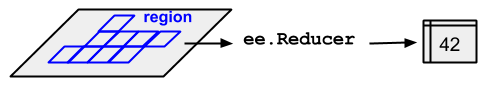

In [ ]:
# Documentation
# Image.reduceRegions(collection, reducer)
# collection: Feature Collection, the features to reduce over
# reducer: Reducer algorithm to apply

popByProvince = population.reduceRegions(admin_Af, ee.Reducer.sum())

In [ ]:
popByProvince

Plot the population values in bar chart using matplotlib library:

In [ ]:
admin1_name = popByProvince.aggregate_array('ADM1_NAME').getInfo()
pop_in_admin1 = popByProvince.aggregate_array('sum').getInfo()

plt.figure(figsize=(20,10))
plt.bar(admin1_name, pop_in_admin1)
plt.xticks(admin1_name, rotation='vertical')
plt.show()

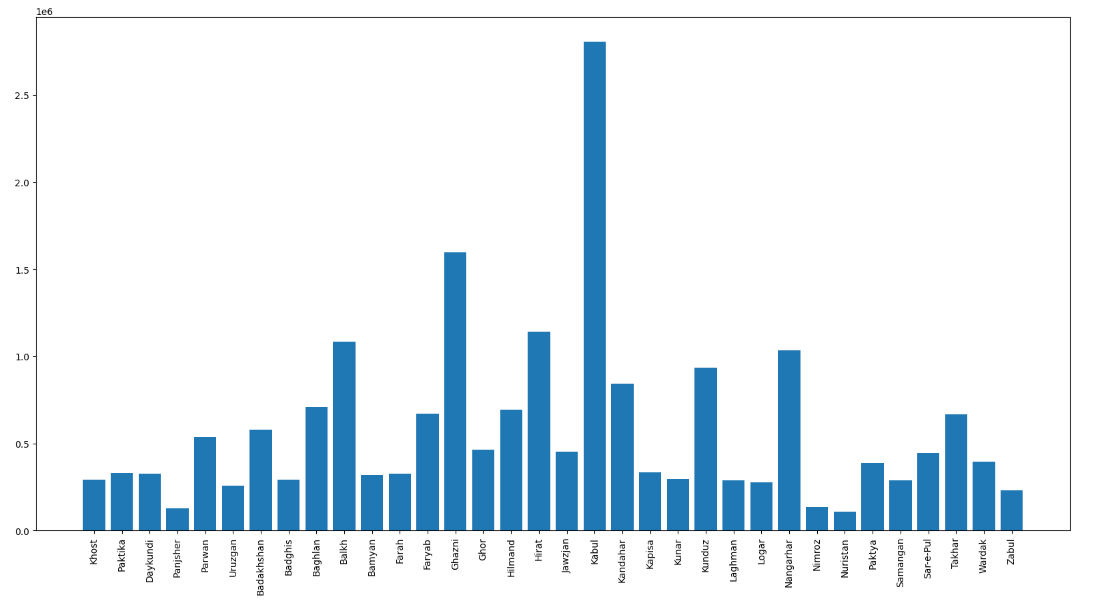

Note: There is a dedicated GEE class for charts, call ui.Chart. But it is only available in the Earth Engine Code Editor (for Javascript)

## Solutions

#### Exercise 1


In [ ]:
display(image.get('SPACECRAFT_ID'))

#### Exercise 2

In [ ]:
vis_param_L8 = {'min': 0, 'max': 30000, 'bands': ['SR_B5', 'SR_B4', 'SR_B3']} # for landsat raw image visualization

Map = geemap.Map(center = center, zoom = zoom,  width=width)
Map.addLayer(image, vis_param_L8, name="FCC - Landsat 8")
Map



# NOTE: Healthy vegetation: Appears bright red.
# Urban areas: Can appear gray or with different shades of gray.
# Water bodies: Tend to be dark.
# Barren or non-vegetated areas: Can vary in color, often appearing brown or gray.
# Overall, this false-color composite is valuable for tasks such as
# monitoring vegetation health, identifying land cover changes, and assessing environmental conditions.
# Different combinations of bands can be used for specific purposes,
# and interpretation may vary based on the specific context of the analysis or study area.

#### Exercise 3

In [ ]:
L8_CloudFilter = L8Col_date.filter(ee.Filter.lt('CLOUD_COVER', 20))
L8_CloudFilter.size().getInfo()

#### Exercise 4

In [ ]:
classify_ndvi = NDVI \
      .where(NDVI.lte(0), 1) \
      .where(NDVI.gte(0).And(NDVI.lt(0.2)), 2) \
      .where(NDVI.gte(0.2), 3) \


Map = geemap.Map(center=center, zoom=zoom, width=width)

# Add the NDVI classification layer with a custom palette
Map.addLayer(
    classify_ndvi,
    {
        'min': 1,
        'max': 3,
        'palette': ['blue', 'green', 'red']
    },
    'NDVI Classification'
)

# Display the map
Map

#### Exercise 5

In [ ]:
image = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterBounds(aoi).filter(ee.Filter.lt('CLOUD_COVER', 10)).first()
EVI = image.expression(
      '2.5 * ((nirBand - redBand) / (nirBand + 6 * redBand - 7.5 * blueBand + 1))',
        {
          'nirBand': image.select('SR_B5'),
          'redBand': image.select('SR_B4'),
          'blueBand': image.select('SR_B2'),
        },
      ).rename("EVI")

Map = geemap.Map(center = center, width=width, zoom = zoom)
vis_Para = {'min': -1, 'max': 1, 'palette': 'Greens'}
Map.addLayer(EVI, vis_Para, name="EVI Map")
Map